In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.misc import imread, imresize, imsave  # for plots 

from sklearn.cluster import KMeans

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [4]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = mersut.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels


In [5]:
mersut = pd.read_csv("c_mersut3.csv")
mersudata = mersut[ :972 ]

In [6]:
#Kurkistetaan datasetin alkuun
mersut.head()

,hinta,ajettu,vuosimalli
0,450,384000,1994
1,700,350000,1998
2,800,331000,1995
3,1100,270000,1995
4,1100,300000,1996


In [7]:
#Katsotaan datasetin peruslukuja
mersut.describe()

,hinta,ajettu,vuosimalli
count,972.000000,972.000000,972.000000
mean,25321.950617,143331.442387,2010.387860
std,14940.297211,108476.725051,5.314107
min,450.000000,0.000000,1991.000000
25%,14900.000000,52750.000000,2008.000000
50%,22950.000000,127750.000000,2012.000000
75%,36800.000000,205000.000000,2015.000000
max,123800.000000,547000.000000,2017.000000


In [8]:
#Katsotaan vielä datasetin perusinfo
mersut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 3 columns):
 hinta         972 non-null int64
 ajettu        972 non-null int64
 vuosimalli    972 non-null int64
dtypes: int64(3)
memory usage: 22.9 KB


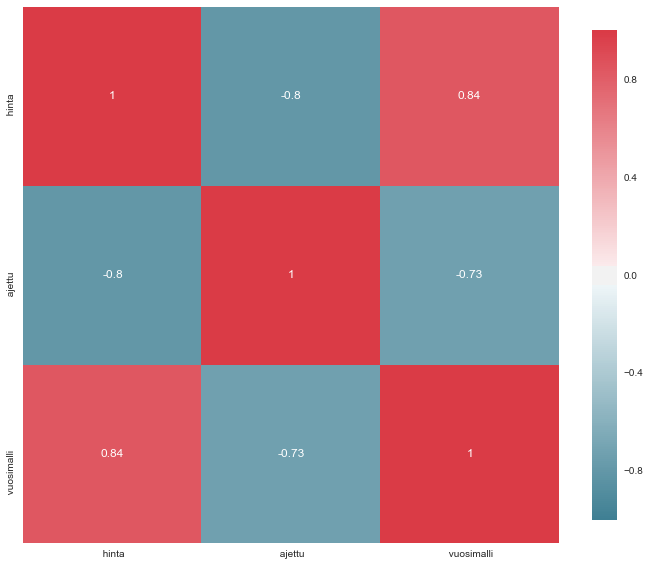

In [57]:
#Plotataan nyt kaikki datasetin muuttujat toisiaan vasten eli hinta, ajettu ja vuosimalli
plot_correlation_map(mersut)

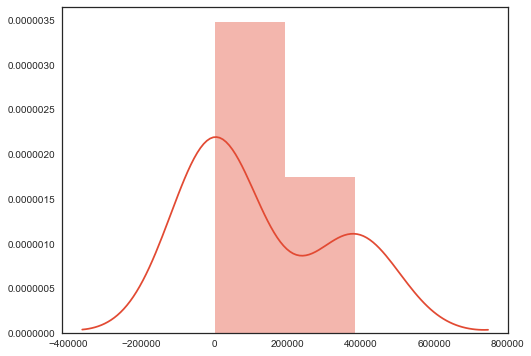

In [78]:
#distribution of cars according to how much they have been driven
sns.distplot(mersut[:1])

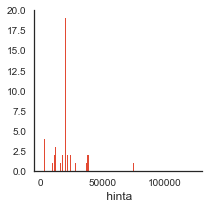

In [71]:
g = sns.FacetGrid(mersut)
g.map(plt.hist, ' hinta', bins=5000)

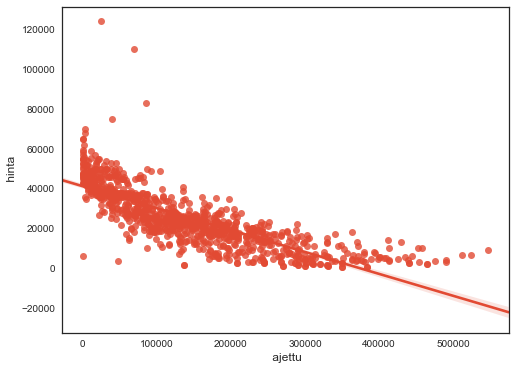

In [9]:
sns.regplot(x=" ajettu", y=" hinta", data=mersut)

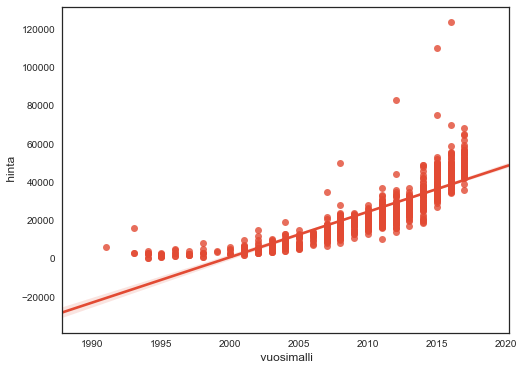

In [79]:
sns.regplot(x=" vuosimalli", y=" hinta", data=mersut)

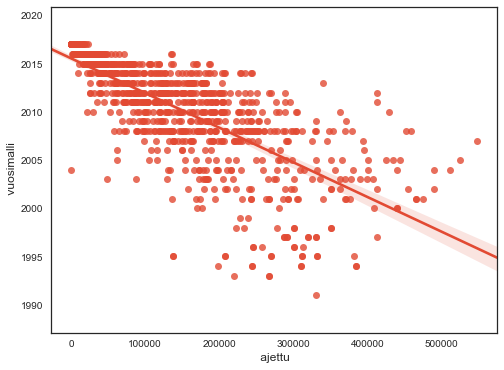

In [81]:
sns.regplot(x=" ajettu", y=" vuosimalli", data=mersut)